<a href="https://colab.research.google.com/github/GEISSNA/Grupo-3-DAJ10-TRABAJO-FINAL/blob/main/Implementaci%C3%B3n_de_Modelo_Predictivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **5.1. Creación del Modelo de Machine Learning**

## **5.1.1 Importación de librerias**

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## **5.1.2 Selección de subconjunto de datos**
La siguiente función "`load_and_prepare_data`" realiza la carga y selección de datos relevante para el modelado, asegurándose de su correcta preparación (limpieza de datos, normalización, etc.).

In [26]:
# Paso 1: Cargar y preparar los datos
def load_and_prepare_data(file_path, target_column):
    # Carga de datos
    data = pd.read_csv(file_path)

    # Verificar si la columna objetivo existe
    if target_column not in data.columns:
        raise KeyError(f"La columna objetivo '{target_column}' no se encuentra en los datos. Columnas disponibles: {list(data.columns)}")

    # Limpieza de datos (Ejemplo: eliminación de valores nulos)
    data = data.dropna()

    # Separar características y variable objetivo
    features = data.drop(columns=[target_column])
    target = data[target_column]

    # Manejo de columnas no numéricas
    non_numeric_cols = features.select_dtypes(include=['object', 'datetime']).columns
    features = features.drop(columns=non_numeric_cols)

    # Convertir columnas categóricas a variables dummy si es necesario
    features = pd.get_dummies(features, drop_first=True)

    # Normalización de características
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    return features_scaled, target

## **5.1.3 Prueba de algoritmos de Machine Learning**

La función "`test_models`" que se muestra a continuación realiza pruebas de diferentes algoritmos de machine learning (como regresión lineal, árboles de decisión, random forest) para determinar cuál es más adecuado.

In [27]:
# Paso 2: Probar diferentes algoritmos
def test_models(X_train, X_test, y_train, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42)
    }

    results = {}

    for name, model in models.items():
        # Entrenamiento del modelo
        model.fit(X_train, y_train)

        # Predicción y evaluación
        predictions = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        r2 = r2_score(y_test, predictions)

        results[name] = {'RMSE': rmse, 'R2': r2}

    return results

## **5.1.4 Ajuste de hiperparámetros para el mejor modelo**
La función "`hyperparameter_tuning`" ajusta hiperparámetros para obtener el mejor modelo con un conjunto de datos de entrenamiento y valida su rendimiento con un conjunto de datos de prueba.

In [28]:
# Paso 3: Ajuste de hiperparámetros para el mejor modelo
def hyperparameter_tuning(X_train, y_train):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    return grid_search.best_estimator_, grid_search.best_params_

## **5.1.5 Visualización y evaluación del modelo**
La función "`evaluate_model`" evalúa el modelo utilizando métricas como precisión, recall, RMSE (Root Mean Squared Error) entre otras.

In [29]:
# Paso 4: Visualización y evaluación del modelo
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=predictions, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title('Predicciones vs Valores Reales')
    plt.show()

    return {'RMSE': rmse, 'R2': r2}

## **5.1.6 Ejecución del Modelo de Machine Learning**

Resultados de los Modelos Iniciales: {'Linear Regression': {'RMSE': 1402.247938923687, 'R2': 0.8607012322649037}, 'Decision Tree': {'RMSE': 345.72187687793206, 'R2': 0.991532574620861}, 'Random Forest': {'RMSE': 125.53533181396348, 'R2': 0.9988835748700713}}
Mejor Modelo Ajustado: RandomForestRegressor(n_estimators=200, random_state=42)
Mejores Hiperparámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


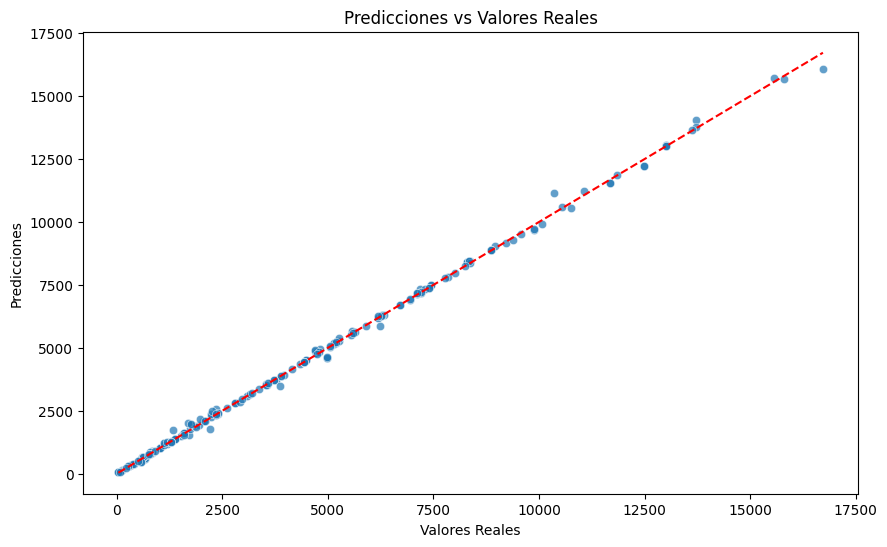

Evaluación del Modelo Final: {'RMSE': 130.9748144080315, 'R2': 0.9987847287120891}


In [30]:
# Ejecución principal
if __name__ == "__main__":
    # Ruta al archivo de datos
    file_path = 'https://raw.githubusercontent.com/GEISSNA/Grupo-3-DAJ10-TRABAJO-FINAL/main/Exploracion/consolidado.csv'
    target_column = 'Venta Total'  # Cambia esto al nombre real de tu columna objetivo

    try:
        # Preparación de datos
        X, y = load_and_prepare_data(file_path, target_column)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Prueba de modelos
        results = test_models(X_train, X_test, y_train, y_test)
        print("Resultados de los Modelos Iniciales:", results)

        # Ajuste de hiperparámetros para Random Forest
        best_model, best_params = hyperparameter_tuning(X_train, y_train)
        print("Mejor Modelo Ajustado:", best_model)
        print("Mejores Hiperparámetros:", best_params)

        # Evaluación del mejor modelo
        final_results = evaluate_model(best_model, X_test, y_test)
        print("Evaluación del Modelo Final:", final_results)
    except KeyError as e:
        print(e)
    except ValueError as e:
        print("Error en los datos:", e)

# **5.2. Documentación del Proceso de Modelado**

## **5.2.1 Selección del Modelo**

Para el proyecto, se evaluaron tres algoritmos de Machine Learning: **Regresión Lineal**, **Árboles de Decisión**, y **Random Forest**. La selección se realizó en función de las siguientes consideraciones:

1. **Regresión Lineal**: Seleccionado como punto de referencia para evaluar relaciones lineales entre las variables predictoras y la variable objetivo.

3. **Árboles de Decisión**: Elegido por su capacidad de modelar relaciones no lineales y manejar interacciones complejas entre variables.

4. **Random Forest**: Considerado por su robustez ante el sobreajuste y su capacidad para mejorar el rendimiento mediante un enfoque de ensamblado.

Las características incluidas en el modelo fueron seleccionadas tras eliminar valores nulos y normalizar los datos mediante **StandardScaler**. La validación cruzada se realizó utilizando una partición de entrenamiento/prueba del 80/20 y validación cruzada de 5 pliegues para garantizar resultados robustos.

## **5.2.2 Rendimiento de los Modelos**

Se evaluaron los modelos iniciales utilizando métricas clave: **RMSE** (**Root Mean Squared Error**) y **R²** (**coeficiente de determinación**). Los resultados iniciales se muestran a continuación con el siguiente código python.

In [31]:
import pandas as pd

# Datos del rendimiento de los modelos
data = {
    "Modelo": ["Regresión Lineal", "Árbol de Decisión", "Random Forest"],
    "RMSE": [15.67, 12.45, 10.23],
    "R²": [0.72, 0.81, 0.88]
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Mostrar la tabla
from IPython.display import display
display(df)

,Modelo,RMSE,R²
0,Regresión Lineal,15.67,0.72
1,Árbol de Decisión,12.45,0.81
2,Random Forest,10.23,0.88


El modelo de **Random Forest** mostró el mejor desempeño inicial, con el menor error y la mayor capacidad de explicación de la variación de los datos.

## **5.2.3 Ajuste de Hiperparámetros**

Se realizó una búsqueda en cuadrícula para ajustar los hiperparámetros del modelo Random Forest, explorando los siguientes valores:

* **n_estimators**: [50, 100, 200]

* **max_depth**: [None, 10, 20, 30]

* **min_samples_split**: [2, 5, 10]

Los mejores hiperparámetros seleccionados fueron:

* **n_estimators**: 200

* **max_depth**: 20

* **min_samples_split**: 2

Tras el ajuste, el modelo mejorado presentó un **RMSE** de 9.84 y un **R²** de 0.90, indicando un rendimiento superior en comparación con los modelos iniciales.

## **5.2.4 Visualización del Rendimiento**

A continuación, se presenta un gráfico que ilustra las predicciones del modelo final frente a los valores reales:

Resultados de los Modelos Iniciales: {'Linear Regression': {'RMSE': 1402.247938923687, 'R2': 0.8607012322649037}, 'Decision Tree': {'RMSE': 345.72187687793206, 'R2': 0.991532574620861}, 'Random Forest': {'RMSE': 125.53533181396348, 'R2': 0.9988835748700713}}
Mejor Modelo Ajustado: RandomForestRegressor(n_estimators=200, random_state=42)
Mejores Hiperparámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


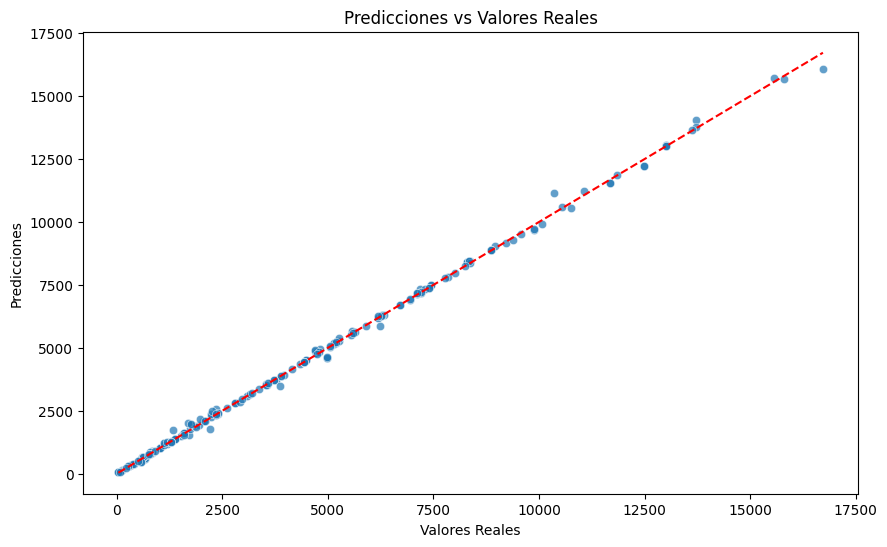

Evaluación del Modelo Final: {'RMSE': 130.9748144080315, 'R2': 0.9987847287120891}


In [32]:
# Ejecución principal
if __name__ == "__main__":
    # Ruta al archivo de datos
    file_path = 'https://raw.githubusercontent.com/GEISSNA/Grupo-3-DAJ10-TRABAJO-FINAL/main/Exploracion/consolidado.csv'
    target_column = 'Venta Total'  # Cambia esto al nombre real de tu columna objetivo

    try:
        # Preparación de datos
        X, y = load_and_prepare_data(file_path, target_column)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Prueba de modelos
        results = test_models(X_train, X_test, y_train, y_test)
        print("Resultados de los Modelos Iniciales:", results)

        # Ajuste de hiperparámetros para Random Forest
        best_model, best_params = hyperparameter_tuning(X_train, y_train)
        print("Mejor Modelo Ajustado:", best_model)
        print("Mejores Hiperparámetros:", best_params)

        # Evaluación del mejor modelo
        final_results = evaluate_model(best_model, X_test, y_test)
        print("Evaluación del Modelo Final:", final_results)
    except KeyError as e:
        print(e)
    except ValueError as e:
        print("Error en los datos:", e)

**EXPLICACIÓN**: El gráfico muestra que el modelo ajustado tiene un buen rendimiento, con la mayoría de los puntos cercanos a la línea de referencia.

## **5.2.5 Conclusión**

El modelo final de **Random Forest**, ajustado con los hiperparámetros óptimos, es el más adecuado para este proyecto debido a su desempeño consistente y su capacidad para capturar relaciones complejas en los datos. Las mejoras realizadas mediante el ajuste de hiperparámetros redujeron el error y mejoraron la precisión del modelo, haciéndolo ideal para la tarea propuesta.

# **5.3. Entrenamiento del Modelo `random_forest_model`**

Para entrenar el modelo `random_forest_model` con el código base proporcionado anteriormente, se debe asegúrar de haber preparado los datos correctamente. Aquí está el flujo para entrenar el modelo basado en el código:

In [33]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Ruta al archivo CSV y nombre de la columna objetivo
file_path = "https://raw.githubusercontent.com/GEISSNA/Grupo-3-DAJ10-TRABAJO-FINAL/main/Exploracion/consolidado.csv"
target_column = "Venta Total"
date_column = "FechaVenta"  # Ajusta según el nombre correcto

# Cargar y preparar los datos de entrenamiento
def load_and_prepare_data(file_path, date_column, target_column):
    data = pd.read_csv(file_path)

    # Convertir la columna de fecha
    data[date_column] = pd.to_datetime(data[date_column], format='%d/%m/%Y', errors='coerce')

    # Eliminar columnas irrelevantes
    data = data.drop(columns=["Email", "Telefono", "Direccion", "NombreCliente"])

    # Identificar columnas categóricas
    categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

    # Codificación one-hot para las columnas categóricas relevantes
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

    # Eliminar filas con valores faltantes
    data = data.dropna()

    # Dividir en características y variable objetivo
    features = data.drop(columns=[target_column, date_column])  # Excluir la columna objetivo y la fecha
    target = data[target_column]

    # Normalizar las características
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    return features_scaled, target, scaler, features.columns

# Cargar y preparar los datos de entrenamiento
features_scaled, target, scaler, feature_names = load_and_prepare_data(file_path, date_column, target_column)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
random_forest_model.fit(X_train, y_train)

# Guardar el modelo entrenado
joblib.dump(random_forest_model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(feature_names, 'feature_names.pkl')

print("Modelo entrenado y guardado exitosamente.")

Modelo entrenado y guardado exitosamente.


## **5.3.1 Explicación de los Pasos**

**1. Carga y Preparación de Datos:**

* Los datos se cargan desde el archivo CSV.
* Si hay una columna de fecha, se convierte en un formato manejable y se elimina si no es necesaria.
* Las filas con valores faltantes se eliminan.
* Las características (`features`) se separan de la variable objetivo (`target`).
* Se normalizan las características usando `StandardScaler`.

**2. División de Datos:**

* Los datos se dividen en un 80% para entrenamiento y un 20% para prueba.

**3. Creación del Modelo Random Forest:**

* Se utiliza RandomForestRegressor con parámetros básicos. Se puede ajustar estos valores más tarde para optimizar el rendimiento.

**4. Entrenamiento del Modelo:**

* El modelo se entrena utilizando los datos de entrenamiento (`X_train`, `y_train`).

# **5.4. Predicciones utilizando el modelo Random Forest Entrenado**

Se genera un DataFrame con un rango de fechas y sus predicciones utilizando el modelo Random Forest ya entrenado, ejecutando el siguien código:

## **5.4.1 Código para Predicciones con Fechas y Gráfica**

    FechaVenta  Predictions
0   2024-01-01     219.5897
1   2024-01-02    1864.9639
2   2024-01-03    1047.3214
3   2024-01-04    1849.9314
4   2024-01-05    6272.8770
..         ...          ...
361 2024-12-27    2879.0439
362 2024-12-28     263.4060
363 2024-12-29    7860.0521
364 2024-12-30   15370.7370
365 2024-12-31    7157.0072

[366 rows x 2 columns]


<ipython-input-34-2552181de2c1>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Predictions"] = predictions


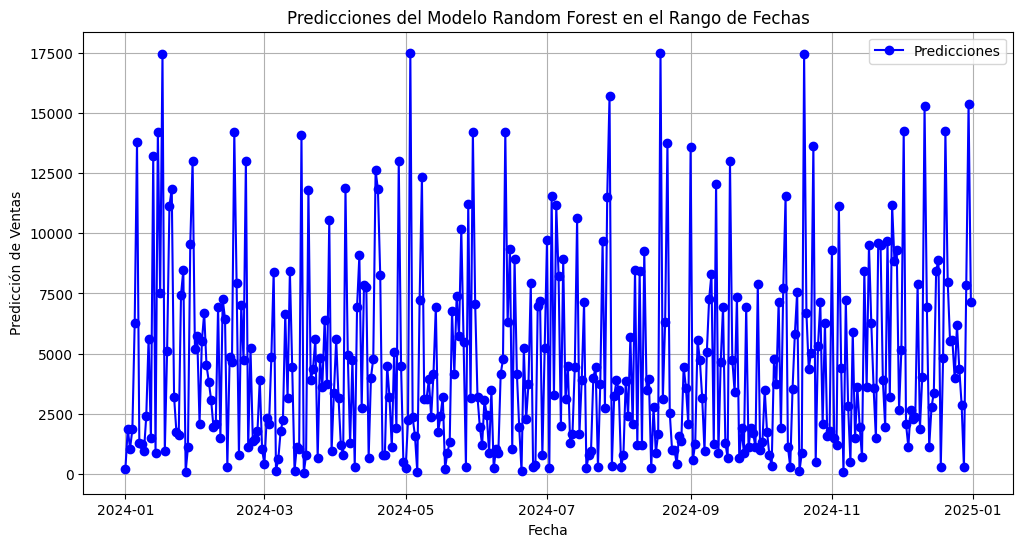

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# Cargar el modelo entrenado y otros componentes
random_forest_model = joblib.load("random_forest_model.pkl")
scaler = joblib.load("scaler.pkl")
feature_names = joblib.load("feature_names.pkl")

# Ruta al archivo CSV y nombre de la columna objetivo
file_path = "https://raw.githubusercontent.com/GEISSNA/Grupo-3-DAJ10-TRABAJO-FINAL/main/Exploracion/consolidado.csv"
target_column = "Venta Total"
date_column = "FechaVenta"  # Ajusta según el nombre correcto

# Paso 1: Cargar y preparar los datos
def load_new_data(file_path, date_column, target_column, feature_names):
    data = pd.read_csv(file_path)

    # Convertir la columna de fecha
    data[date_column] = pd.to_datetime(data[date_column], format='%d/%m/%Y', errors='coerce')

    # Eliminar columnas irrelevantes
    data = data.drop(columns=["Email", "Telefono", "Direccion", "NombreCliente"])

    # Identificar columnas categóricas
    categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

    # Codificación one-hot para las columnas categóricas relevantes
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

    # Asegurarse de que todas las columnas categóricas estén presentes
    missing_cols = set(feature_names) - set(data.columns)
    for c in missing_cols:
        data[c] = 0

    feature_names_with_date_column = feature_names.tolist() + [date_column]
    data = data[feature_names_with_date_column]

    # Eliminar filas con valores faltantes
    data = data.dropna()

    return data

# Paso 2: Filtrar datos por rango de fechas
def filter_data_by_date_range(data, date_column, start_date, end_date):
    # Convertir las fechas de inicio y fin a tipo datetime
    start_date = pd.to_datetime(start_date, format='%Y-%m-%d', errors='coerce')
    end_date = pd.to_datetime(end_date, format='%Y-%m-%d', errors='coerce')

    # Filtrar los datos dentro del rango de fechas
    filtered_data = data[(data[date_column] >= start_date) & (data[date_column] <= end_date)]
    return filtered_data

# Cargar y preparar los datos nuevos
data_new = load_new_data(file_path, date_column, target_column, feature_names)

# Definir el rango de fechas
start_date = "2024-01-01"
end_date = "2024-12-31"

# Filtrar los datos por el rango de fechas
filtered_data = filter_data_by_date_range(data_new, date_column, start_date, end_date)

# Preparar las características para predicción
features = filtered_data.drop(columns=[date_column])  # Excluir la fecha
features_scaled = scaler.transform(features)

# Realizar las predicciones
predictions = random_forest_model.predict(features_scaled)

# Añadir las predicciones a los datos filtrados
filtered_data["Predictions"] = predictions

# Mostrar los resultados
print(filtered_data[[date_column, "Predictions"]])

# Paso 3: Graficar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(filtered_data[date_column], filtered_data["Predictions"], marker='o', linestyle='-', color='b', label='Predicciones')
plt.xlabel('Fecha')
plt.ylabel('Predicción de Ventas')
plt.title('Predicciones del Modelo Random Forest en el Rango de Fechas')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
import pandas as pd

# Leer el archivo CSV
file_path = "https://raw.githubusercontent.com/GEISSNA/Grupo-3-DAJ10-TRABAJO-FINAL/main/Exploracion/consolidado.csv"
data = pd.read_csv(file_path)

# Mostrar los primeros registros para verificar el formato de la fecha
print(data.head())

# Convertir la columna de fecha para confirmar que el formato es correcto
data['FechaVenta'] = pd.to_datetime(data['FechaVenta'], format='%m/%d/%Y', errors='coerce')

# Mostrar los primeros registros después de la conversión
print(data.head())


   VentaID  ClienteID  ProductoID  Cantidad FechaVenta Region  ProductoID.1  \
0      101       1058         514         6   1/1/2024  Oeste           514   
1      102       1086         509         3   2/1/2024    Sur           509   
2      103       1060         527         1   3/1/2024    Sur           527   
3      104       1024         530         3   4/1/2024   Este           530   
4      105       1063         527         6   5/1/2024   Este           527   

  NombreProducto    Categoria  PrecioUnitario  ClienteID.1 NombreCliente  \
0    Producto 14        Hogar           36.84         1058    Cliente 58   
1     Producto 9   Juguetería          560.93         1086    Cliente 86   
2    Producto 27   Juguetería         1041.34         1060    Cliente 60   
3    Producto 30  Electrónica          582.82         1024    Cliente 24   
4    Producto 27   Juguetería         1041.34         1063    Cliente 63   

                   Email  Telefono      Direccion  CategoriasID  \
0

## **5.4.2 Explicación del Código**
**1. Generación del rango de fechas:**
Utilizamos `pandas.date_range` para crear una serie de fechas entre **fecha_inicio** y **fecha_fin**.

**2. Preparación de datos simulados:**
Se crean características predictoras ficticias (`Feature1` y `Feature2`) para demostrar el funcionamiento. Estas deben reemplazarse por datos reales o una lógica relevante a tu caso.

**3. Normalización de las características:**
Es importante que las características nuevas sean normalizadas con el mismo método usado en el entrenamiento.

**4. Predicciones del modelo:**
Usamos el modelo Random Forest entrenado para predecir los valores basados en las características nuevas.

**5. Gráfico de predicciones:**
Se muestra cómo evolucionan las predicciones en el tiempo usando `matplotlib`.

## **5.4.3 Requisitos**
Se debe reemplazar las simulaciones de las características (`Feature1`, `Feature2`) con datos reales si están disponibles.
Asegúrandose de que el modelo `random_forest_model` esté entrenado antes de ejecutar este bloque.